In [1]:
# StreetEasy is New York City’s leading real estate marketplace. You will be working with a
# dataset that contains a sample of 3,540 rentals listings in Manhattan.
# https://www.kaggle.com/zohaib30/streeteasy-dataset?select=manhattan.csv

In [2]:
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

### Step 1: Load your data, including testing/training split from Project 1.

In [3]:
manhattan = pd.read_csv('manhattan.csv')
manhattan.shape
#below we can see our dataset has 3539 rows and 18 columns 

(3539, 18)

In [4]:
y = manhattan["rent"]
print(y.head()) # y variable

0     2550
1    11500
2     4500
3     4795
4    17500
Name: rent, dtype: int64


In [5]:
X = manhattan.drop(["rent"], axis=1)
print(X.head()) # X variable

   rental_id  bedrooms  bathrooms  size_sqft  min_to_subway  floor  \
0       1545       0.0          1        480              9    2.0   
1       2472       2.0          2       2000              4    1.0   
2       2919       1.0          1        916              2   51.0   
3       2790       1.0          1        975              3    8.0   
4       3946       2.0          2       4800              3    4.0   

   building_age_yrs  no_fee  has_roofdeck  has_washer_dryer  has_doorman  \
0                17       1             1                 0            0   
1                96       0             0                 0            0   
2                29       0             1                 0            1   
3                31       0             0                 0            1   
4               136       0             0                 0            1   

   has_elevator  has_dishwasher  has_patio  has_gym       neighborhood  \
0             1               1          0      

In [6]:
from sklearn.model_selection import train_test_split

# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.40)

In [7]:
X_train.shape #60% of the data

(2123, 17)

In [8]:
X_test.shape #40% of the data

(1416, 17)

### Step 2: (If not already done in Project 1) Prepare your data

## Training Set

In [9]:
X_train_cleaned = X_train.copy() # copy of train dataset

In [10]:
X_train_cleaned.isnull().sum() # not missing values

rental_id           0
bedrooms            0
bathrooms           0
size_sqft           0
min_to_subway       0
floor               0
building_age_yrs    0
no_fee              0
has_roofdeck        0
has_washer_dryer    0
has_doorman         0
has_elevator        0
has_dishwasher      0
has_patio           0
has_gym             0
neighborhood        0
borough             0
dtype: int64

In [11]:
# I'm dropping the borough column since this dataset is entirely about Manhattan
X_train_cleaned = X_train_cleaned.drop(["borough"], axis=1)

In [12]:
# onehot encoding
from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
from sklearn.preprocessing import OneHotEncoder

X_train_cat = X_train_cleaned['neighborhood'].values.reshape(-1,1)

cat_encoder = OneHotEncoder(sparse=False)
X_train_cat_1hot = cat_encoder.fit_transform(X_train_cat)
X_train_cat_1hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Test Set

In [13]:
X_test_cleaned = X_test.copy()

In [14]:
X_test_cleaned.isnull().sum() # not missisng values

rental_id           0
bedrooms            0
bathrooms           0
size_sqft           0
min_to_subway       0
floor               0
building_age_yrs    0
no_fee              0
has_roofdeck        0
has_washer_dryer    0
has_doorman         0
has_elevator        0
has_dishwasher      0
has_patio           0
has_gym             0
neighborhood        0
borough             0
dtype: int64

In [15]:
# I'm dropping the borough column since this dataset is entirely about Manhattan
X_test_cleaned = X_test_cleaned.drop(["borough"], axis=1)

In [16]:
# onehot encoding
from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
from sklearn.preprocessing import OneHotEncoder

X_test_cat = X_test_cleaned['neighborhood'].values.reshape(-1,1)

cat_encoder = OneHotEncoder(sparse=False)
X_test_cat_1hot = cat_encoder.fit_transform(X_test_cat)
X_test_cat_1hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

###  Step 3: Examine your target attribute. Based on the data exploration you did in Project 1, confirm and examine the attribute you are going to predict.

In [17]:
# Examine and plot the distribution of the target attribute in your training set 
# (e.g., is it Gaussian, uniform, logarithmic). This will help you interpret the performance of 
# different algorithms on your data.

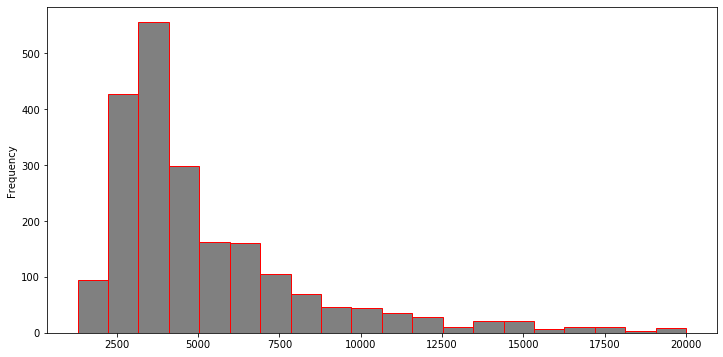

In [18]:
y_train.plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='red')

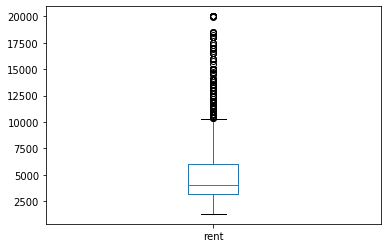

In [19]:
y_train.plot.box()

In [20]:
y_train.describe()

count     2123.000000
mean      5198.022138
std       3177.518374
min       1300.000000
25%       3195.000000
50%       4050.000000
75%       6029.000000
max      20000.000000
Name: rent, dtype: float64

In [21]:
X_train_cleaned.shape

(2123, 16)

### Step 4: Selected two of the following supervised learning algorithms, ideally one from the first half of the list and one from the second half of the list 

In [22]:
#logistic regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(X_train_cat_1hot, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train_cat_1hot, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test_cat_1hot, y_test)))

C:\Users\kathi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kathi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training set score: 0.041


ValueError: X has 32 features per sample; expecting 30

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train_cat_1hot, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train_cat_1hot, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test_cat_1hot, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))